# Lab 2- Jaide Swanson

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal

## Problem 1

In [66]:
x= np.arange(0,20)
mu_background= 2
mu= 7

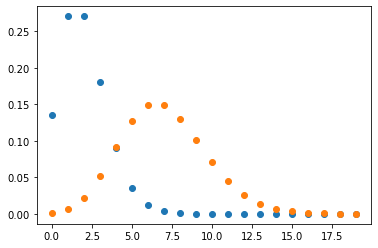

In [67]:
fig, ax = plt.subplots(1, 1)
ax.plot(x,stats.poisson.pmf(x,mu_background),'o',label='Background')
ax.plot(x,stats.poisson.pmf(x,mu),'o')
plt.show()

In [5]:
poiss= stats.poisson.pmf(x,mu_background)
conv_2=scipy.signal.convolve(poiss,poiss)

In [6]:
conv_2

array([1.83156389e-02, 7.32625556e-02, 1.46525111e-01, 1.95366815e-01,
       1.95366815e-01, 1.56293452e-01, 1.04195635e-01, 5.95403626e-02,
       2.97701813e-02, 1.32311917e-02, 5.29247668e-03, 1.92453697e-03,
       6.41512324e-04, 1.97388408e-04, 5.63966879e-05, 1.50391168e-05,
       3.75977919e-06, 8.84653927e-07, 1.96589762e-07, 4.13873182e-08,
       8.27744786e-09, 1.57662666e-09, 2.86630688e-10, 4.98305103e-11,
       8.29631394e-12, 1.32404212e-12, 2.02619266e-13, 2.97206577e-14,
       4.17420729e-15, 5.60390075e-16, 7.17485632e-17, 8.73527853e-18,
       1.00753160e-18, 1.09537149e-19, 1.11413432e-20, 1.04722808e-21,
       8.88850998e-23, 6.46437089e-24, 3.40230047e-25])

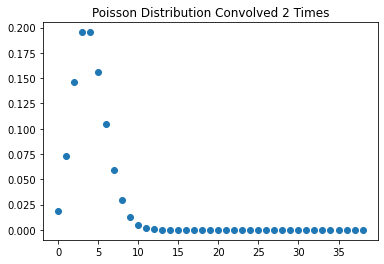

In [7]:
x_conv=np.arange(0,len(conv_2))
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Convolved 2 Times')
ax.plot(x_conv,conv_2,'o')
plt.show()

In [9]:
conv_3=scipy.signal.convolve(poiss,conv_2)

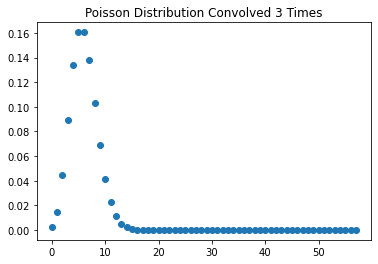

In [10]:
x_conv3=np.arange(0,len(conv_3))
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Convolved 3 Times')
ax.plot(x_conv3,conv_3,'o')
plt.show()

In [11]:
conv_4=scipy.signal.convolve(poiss,conv_3)
conv_5=scipy.signal.convolve(poiss,conv_4)

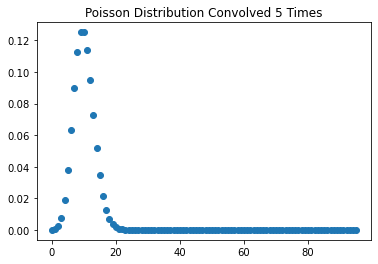

In [12]:
x_conv5=np.arange(0,len(conv_5))
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Convolved 5 Times')
ax.plot(x_conv5,conv_5,'o')
plt.show()

After 5 days the distribution remains as a poisson distributiobn which can be seen in the final plot. This is due to the fact that the mean value is just shifting and the distribution is staying the same as we are adding more discrete values. 

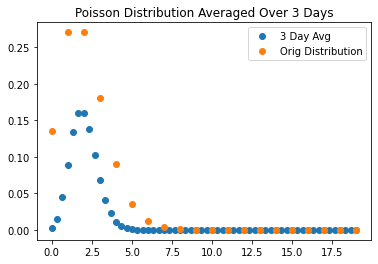

In [18]:
x_avg3=x_conv3/3
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Averaged Over 3 Days')
ax.plot(x_avg3,conv_3,'o', label= '3 Day Avg')
ax.plot(x,stats.poisson.pmf(x,mu_background),'o', label= "Orig Distribution")
plt.legend()
plt.show()

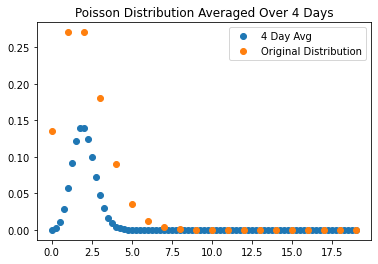

In [20]:
x_conv4=np.arange(0,len(conv_4))
x_avg4=x_conv4/4
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Averaged Over 4 Days')
ax.plot(x_avg4,conv_4,'o', label='4 Day Avg')
ax.plot(x,stats.poisson.pmf(x,mu_background),'o', label='Original Distribution')
plt.legend()
plt.show()

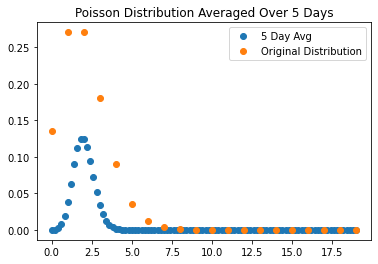

In [21]:
x_conv5=np.arange(0,len(conv_5))
x_avg5=x_conv5/5
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Averaged Over 5 Days')
ax.plot(x_avg5,conv_5,'o',label='5 Day Avg')
ax.plot(x,stats.poisson.pmf(x,mu_background),'o', label='Original Distribution')
plt.legend()
plt.show()

As we average the number of days the overall distribution becomes smaller as our x values are rescaled on the same axis as the original distribution to account for the average. This comparison can be seen within the previous plots as the convolved avegaes are plotted with the original background distribution. 

In [16]:
def conv_pdf(r,pdf_array):
    for i in range(r):
        array= pdf_array
        conv=scipy.signal.convolve(array,array)
        for j in range(r-1):
                conv=scipy.signal.convolve(array,conv)
    return conv     

Number of days: 8

Y*N= 56 for the signal detection

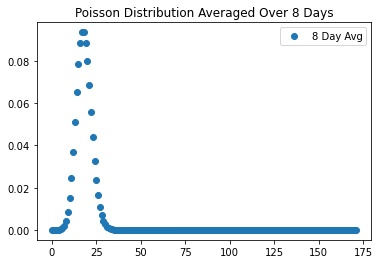

In [73]:
poiss_conv= conv_pdf(8,poiss)
x_conv8=np.arange(0,len(poiss_conv))
x_avg8=x_conv8/8
fig, ax = plt.subplots(1, 1)
ax.set_title('Poisson Distribution Averaged Over 8 Days')
ax.plot(x_conv8,poiss_conv,'o',label='8 Day Avg')
plt.legend()
plt.show()

In [74]:
prob_56=sum(poiss_conv[x] for x in range(56, len(poiss_conv)))
print(prob_56)

6.156881019747257e-13


In [76]:
stats.norm.ppf(prob_56, loc=0, scale=1)

-7.101805310522398

To determine the sigma of this 8 day observation the probability must be determined for the observed 56 events. To do so the we integrate distribution from 56 to infinity or for our purposed by summing the distribution from 56 out to the length of the 8 time convolved distribution array. The returned probability can then be passed for if it was normal distribution with that same probability and the corresponding sigma value is returned which gives us a sigma value of about 7.1. 

## Problem 2

In [23]:
x_ray=np.arange(0,10)
rayleigh= stats.rayleigh.pdf(x_ray)

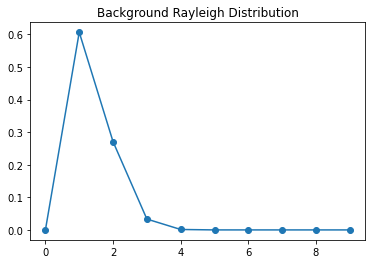

In [24]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Background Rayleigh Distribution')
ax.plot(x_ray,rayleigh,'o-')
plt.show()

In [26]:
ray_conv= conv_pdf(3,rayleigh)

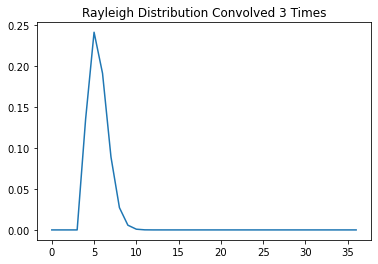

In [27]:
x_ray_conv=np.arange(0,len(ray_conv))
fig, ax = plt.subplots(1, 1)
ax.set_title('Rayleigh Distribution Convolved 3 Times')
ax.plot(x_ray_conv,ray_conv)
plt.show()

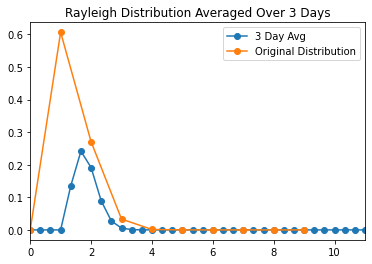

In [30]:
x_ray_avg3=x_ray_conv/3
#x_ray_avg3=np.linspace(0,10,len(ray_conv))
fig, ax = plt.subplots(1, 1)
plt.xlim([0,11])
ax.set_title('Rayleigh Distribution Averaged Over 3 Days')
ax.plot(x_ray_avg3,ray_conv,'o-', label='3 Day Avg')
ax.plot(x_ray,rayleigh,'o-', label='Original Distribution')
plt.legend()
plt.show()

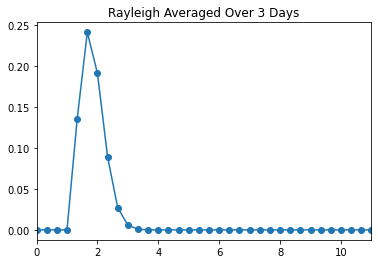

In [36]:
fig, ax = plt.subplots(1, 1)
plt.xlim([0,11])
ax.set_title('Rayleigh Averaged Over 3 Days')
ax.plot(x_ray_avg3,ray_conv,'o-')
plt.show()

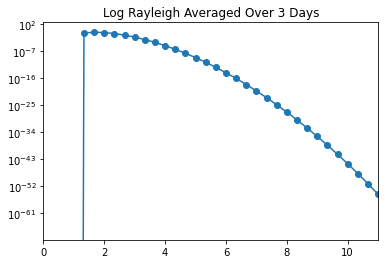

In [37]:
fig, ax = plt.subplots(1, 1)
plt.xlim([0,11])
plt.yscale('log')
ax.set_title('Log Rayleigh Averaged Over 3 Days')
ax.plot(x_ray_avg3,ray_conv,'o-')
plt.show()

In [33]:
ray_conv6=conv_pdf(6,rayleigh)
x_conv6=np.arange(0,len(ray_conv6))

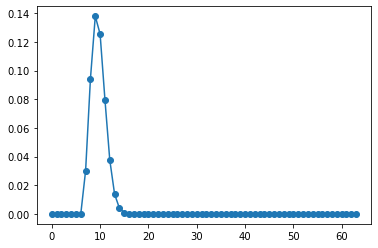

In [34]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_conv6,ray_conv6,'o-')
plt.show()

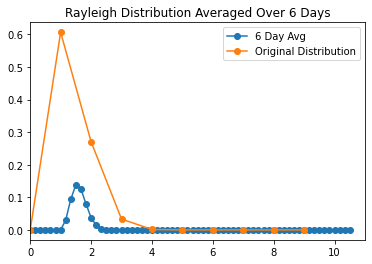

In [35]:
x_avg6=x_conv6/6
fig, ax = plt.subplots(1, 1)
plt.xlim([0,11])
ax.set_title('Rayleigh Distribution Averaged Over 6 Days')
ax.plot(x_avg6,ray_conv6,'o-', label='6 Day Avg')
ax.plot(x_ray,rayleigh,'o-', label='Original Distribution')
plt.legend()
plt.show()

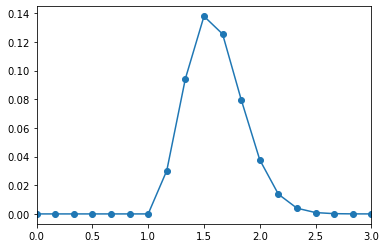

In [27]:
fig, ax = plt.subplots(1, 1)
plt.xlim([0,3])
ax.plot(x_avg6,ray_conv6,'o-')
#ax.plot(x_ray,rayleigh,'o-')
plt.show()

From the previous plots as the rayleigh distribution is averaged over more days the shape begins to gte smaller but also take on a more gaussian form. After 3 averaged convolutions the shape begins to look a bit like a gaussian but by plotting the logarithmic form we can see that it is not  After 6 averaged convolutions this gaussian shape becomes more apparent. This is an example of the central limit theorem where a distribution that is averaged enough times will begin to take shape as a gaussian. 

# Problem 3

## Version 1

In [40]:
x = np.linspace(2,6,1000)

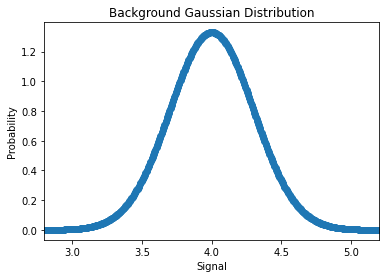

In [41]:
fig, ax = plt.subplots(1, 1)
plt.xlim([2.8,5.2])
ax.set_title('Background Gaussian Distribution')
plt.xlabel('Signal')
plt.ylabel('Probability')
ax.plot(x,stats.norm.pdf(x,loc = 4., scale = 0.3),'o')
plt.show()

Chosen Signal strength: 4.4

In [45]:
prob=1-stats.norm.cdf(4.4,loc=4.,scale=0.3)
prob

0.09121121972586765

In [46]:
stats.norm.ppf(prob, loc=4.,scale=0.3)

3.5999999999999996

With a chosen signal of 4.4 by integrating this distribution from the chosen signal strength to infinity the cdf() function returns a probability of about 0.09 which can then be used to determine a sigma value from the .ppf() function which returns a value of about 3.6  This means we cannot claim a discovery with this detection as it is too low and not at the 5 sigma mark.

## Version 2

For version 2 the statistical question we want to answer is:

Assuming the background for 1 pixel is a gaussian distribution with a mean of 4.0, what is the probablity of a 4.4 signal detection over 10k pixels?

In [52]:
norm=stats.norm.pdf(x,loc = 4., scale = 0.3)
norm_10k=(10000)*norm

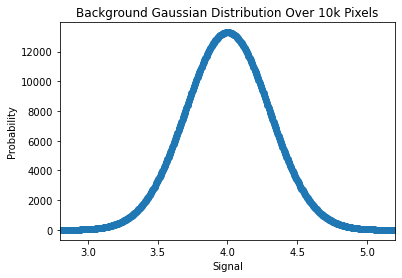

In [53]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Background Gaussian Distribution Over 10k Pixels')
plt.xlabel('Signal')
plt.ylabel('Probability')
plt.xlim([2.8,5.2])
ax.plot(x,norm_10k,'o')
plt.show()

In [57]:
normalize=sum(norm_10k[x] for x in range(len(norm_10k)))
p=sum(norm_10k[x]/normalize for x in range(4, len(norm_10k)))
print(p)

0.9999999999945376


In [58]:
prob_10k= 10000*prob
prob_10k

912.1121972586766

In [59]:
stats.norm.ppf(p, loc=4.,scale=0.3)

6.03812796348367

In the case of observing over 10k pixels a discvery can be claimed as the resulting sigma value is about 6.04 passing the 5 sigma threshold. 

# Problem 4

In [60]:
sigma_5= 1/3e6

In [61]:
det= stats.norm.ppf(1-sigma_5)
det

4.970830636689148

In [62]:
1-stats.norm.cdf(det)

3.33333333379926e-07

In [63]:
det_10k= stats.norm.ppf(1-sigma_5/10000)
det_10k

6.527970838041796

In [64]:
(1-stats.norm.cdf(det_10k))*10000

3.33333360913457e-07

The required signal for a 5 sigma detection in version 1 is about 4.97 while the required signal for the same 5 sigma detection for version 2 is about 6.53. There is a difference in these but not a very large one considering the number of pixels being surveyed. Looking at the distributions this can be explained as the overall distirbution stays the same and is just scaled on the y axis for the increased number of pixels.

In [77]:
det_increase= stats.norm.ppf(1-sigma_5/1e7)
det_increase

7.4943782220262705

By increasing the trials factor by 2 orders of magnitude the effect on a 5 sigma detection is not very significant, the required value is only increased by about 1. 